# Influence of Electricity Consumption by Cooling (Hot Weather) - Single Building

- Dongkyu Lee

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

First, we import the energy data for a single building

In [3]:
Abigail = pd.read_csv("본인PC경로\\Office_Abigail.csv", parse_dates=True, index_col='timestamp')

In [4]:
Abigail.head()

Office_Abigail
timestamp                          
2015-01-01 00:00:00            5.33
2015-01-01 01:00:00            5.41
2015-01-01 02:00:00            5.60
2015-01-01 03:00:00            6.50
2015-01-01 04:00:00            5.39

Looks like we have a power meter 

# ok, now let's find which weather file we need

In [5]:
meta = pd.read_csv("all_buildings_meta_data.csv", index_col='uid')

In [6]:
meta.head()

dataend       datastart  energystarscore  \
uid                                                                    
PrimClass_Everett    31/12/12 23:00  01/01/12 00:00              NaN   
UnivClass_Clifford   31/12/15 23:00  01/01/15 00:00              NaN   
Office_Elizabeth     31/12/12 23:00  01/01/12 00:00              NaN   
Office_Ellie         31/12/12 23:00  01/01/12 00:00              NaN   
PrimClass_Elisabeth  31/12/12 23:00  01/01/12 00:00              NaN   

                    heatingtype             industry mainheatingtype  \
uid                                                                    
PrimClass_Everett           NaN            Education             NaN   
UnivClass_Clifford          NaN            Education             NaN   
Office_Elizabeth            NaN  Commercial Property             NaN   
Office_Ellie                NaN  Commercial Property             NaN   
PrimClass_Elisabeth         NaN            Education             NaN   

                     numberoffloors  occupants            primaryspaceusage  \
uid                                                                           
PrimClass_Everett               NaN        NaN  Primary/Secondary Classroom   
UnivClass_Clifford              NaN        NaN            College Classroom   
Office_Elizabeth                NaN        NaN                       Office   
Office_Ellie                    NaN        NaN                       Office   
PrimClass_Elisabeth             NaN        NaN  Primary/Secondary Classroom   

                    rating      sqft           sqm               subindustry  \
uid                                                                            
PrimClass_Everett      NaN  105530.0   9804.053590  Primary/Secondary School   
UnivClass_Clifford     NaN   56969.0   5292.591007        College/University   
Office_Elizabeth       NaN  294651.0  27373.961850    Commercial Real Estate   
Office_Ellie           NaN  496517.0  46127.918850   Bank/Financial Services   
PrimClass_Elisabeth    NaN  233062.0  21652.158990  Primary/Secondary School   

                                timezone yearbuilt   nickname  \
uid                                                             
PrimClass_Everett       America/New_York       NaN    Everett   
UnivClass_Clifford      America/New_York      1967   Clifford   
Office_Elizabeth     America/Los_Angeles       NaN  Elizabeth   
Office_Ellie         America/Los_Angeles       NaN      Ellie   
PrimClass_Elisabeth     America/New_York       NaN  Elisabeth   

                    primaryspaceuse_abbrev newweatherfilename  
uid                                                            
PrimClass_Everett                PrimClass      weather12.csv  
UnivClass_Clifford               UnivClass       weather2.csv  
Office_Elizabeth                    Office      weather22.csv  
Office_Ellie                        Office      weather28.csv  
PrimClass_Elisabeth              PrimClass      weather23.csv

In [7]:
meta[meta.index == 'Office_Abigail']['newweatherfilename'][0]

'weather0.csv'

# ok, the weather file is `weather0`

In [8]:
weather = pd.read_csv("weather0.csv", index_col='timestamp', parse_dates=True)

In [9]:
weather.head()

TimeMST  TemperatureC  Dew PointC  Humidity  \
timestamp                                                           
2015-01-01 00:51:00  12:51 AM           2.8        -0.6      79.0   
2015-01-01 01:47:00   1:47 AM           3.0        -1.0      75.0   
2015-01-01 01:51:00   1:51 AM           2.8        -0.6      79.0   
2015-01-01 02:51:00   2:51 AM           2.8        -1.1      76.0   
2015-01-01 03:51:00   3:51 AM           2.2        -0.6      82.0   

                     Sea Level PressurehPa  VisibilityKm Wind Direction  \
timestamp                                                                 
2015-01-01 00:51:00                 1016.0          16.1            WNW   
2015-01-01 01:47:00                 1016.5          16.1            WNW   
2015-01-01 01:51:00                 1016.9          16.1            WNW   
2015-01-01 02:51:00                 1017.2          16.1             NW   
2015-01-01 03:51:00                 1017.5          16.1            ENE   

                    Wind SpeedKm/h Gust SpeedKm/h  Precipitationmm Events  \
timestamp                                                                   
2015-01-01 00:51:00            9.3              -              NaN    NaN   
2015-01-01 01:47:00            5.6              -              NaN    NaN   
2015-01-01 01:51:00            7.4              -              NaN    NaN   
2015-01-01 02:51:00            5.6              -              NaN    NaN   
2015-01-01 03:51:00            5.6              -              NaN    NaN   

                           Conditions  WindDirDegrees  \
timestamp                                               
2015-01-01 00:51:00     Mostly Cloudy             300   
2015-01-01 01:47:00     Mostly Cloudy             300   
2015-01-01 01:51:00     Mostly Cloudy             300   
2015-01-01 02:51:00  Scattered Clouds             320   
2015-01-01 03:51:00     Partly Cloudy              60   

                                 DateUTC<br />          timestamp.1  
timestamp                                                            
2015-01-01 00:51:00  2015-01-01 07:51:00<br />  2015-01-01 00:51:00  
2015-01-01 01:47:00  2015-01-01 08:47:00<br />  2015-01-01 01:47:00  
2015-01-01 01:51:00  2015-01-01 08:51:00<br />  2015-01-01 01:51:00  
2015-01-01 02:51:00  2015-01-01 09:51:00<br />  2015-01-01 02:51:00  
2015-01-01 03:51:00  2015-01-01 10:51:00<br />  2015-01-01 03:51:00

In [10]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8999 entries, 2015-01-01 00:51:00 to 2015-12-31 23:51:00
Data columns (total 15 columns):
TimeMST                  8999 non-null object
TemperatureC             8999 non-null float64
Dew PointC               8999 non-null float64
Humidity                 8990 non-null float64
Sea Level PressurehPa    8999 non-null float64
VisibilityKm             8999 non-null float64
Wind Direction           8999 non-null object
Wind SpeedKm/h           8999 non-null object
Gust SpeedKm/h           8999 non-null object
Precipitationmm          443 non-null float64
Events                   330 non-null object
Conditions               8999 non-null object
WindDirDegrees           8999 non-null int64
DateUTC<br />            8999 non-null object
timestamp.1              8999 non-null object
dtypes: float64(6), int64(1), object(8)
memory usage: 1.1+ MB


# Turns out that the timestamp is not lined up with the electrical meter, so let's `resample`

### <font color='red'>It would be more accurate to remove the outliers before resampling the data.</font>

In [11]:
weather_hourly = weather.resample('H').mean()

In [12]:
weather_hourly.head()

TemperatureC  Dew PointC  Humidity  \
timestamp                                                 
2015-01-01 00:00:00           2.8        -0.6      79.0   
2015-01-01 01:00:00           2.9        -0.8      77.0   
2015-01-01 02:00:00           2.8        -1.1      76.0   
2015-01-01 03:00:00           2.2        -0.6      82.0   
2015-01-01 04:00:00           2.2        -1.1      79.0   

                     Sea Level PressurehPa  VisibilityKm  Precipitationmm  \
timestamp                                                                   
2015-01-01 00:00:00                 1016.0          16.1              NaN   
2015-01-01 01:00:00                 1016.7          16.1              NaN   
2015-01-01 02:00:00                 1017.2          16.1              NaN   
2015-01-01 03:00:00                 1017.5          16.1              NaN   
2015-01-01 04:00:00                 1017.9          16.1              NaN   

                     WindDirDegrees  
timestamp                            
2015-01-01 00:00:00           300.0  
2015-01-01 01:00:00           300.0  
2015-01-01 02:00:00           320.0  
2015-01-01 03:00:00            60.0  
2015-01-01 04:00:00            70.0

# Let's plot the data

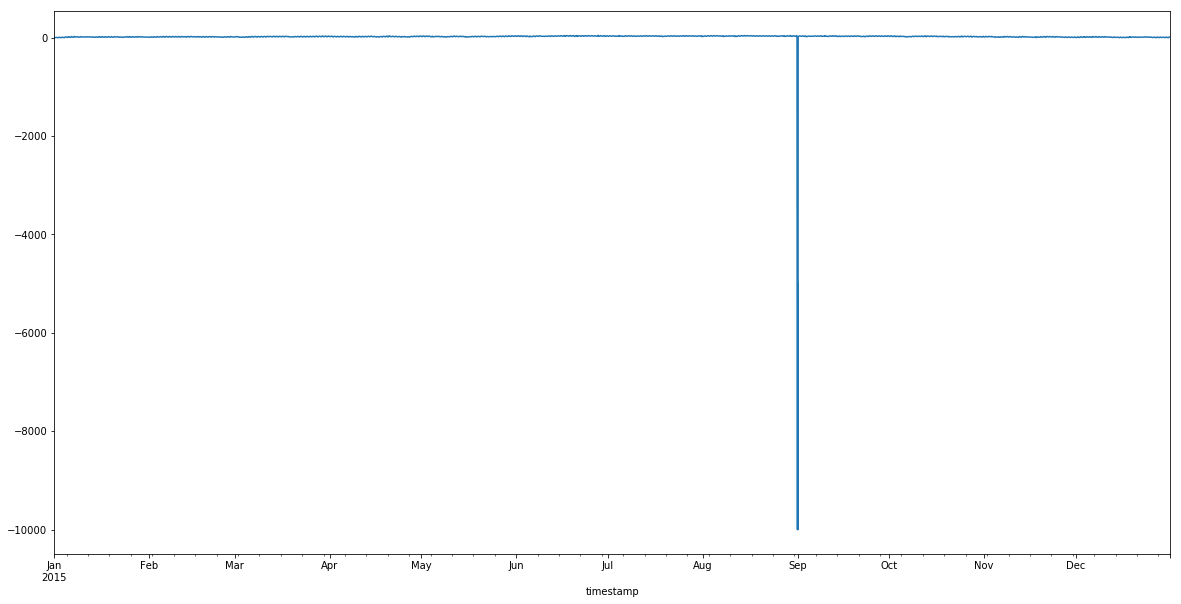

In [13]:
weather_hourly['TemperatureC'].plot(figsize=(20,10))

# We have to remove that outlier

In [14]:
weather_hourly_nooutlier = weather_hourly[weather_hourly > 0]

### <font color='red'> Only the temperautre column needs to the cleaned: weather_nooutlier = weather[weather["TemperatureC"] > -40]</font>

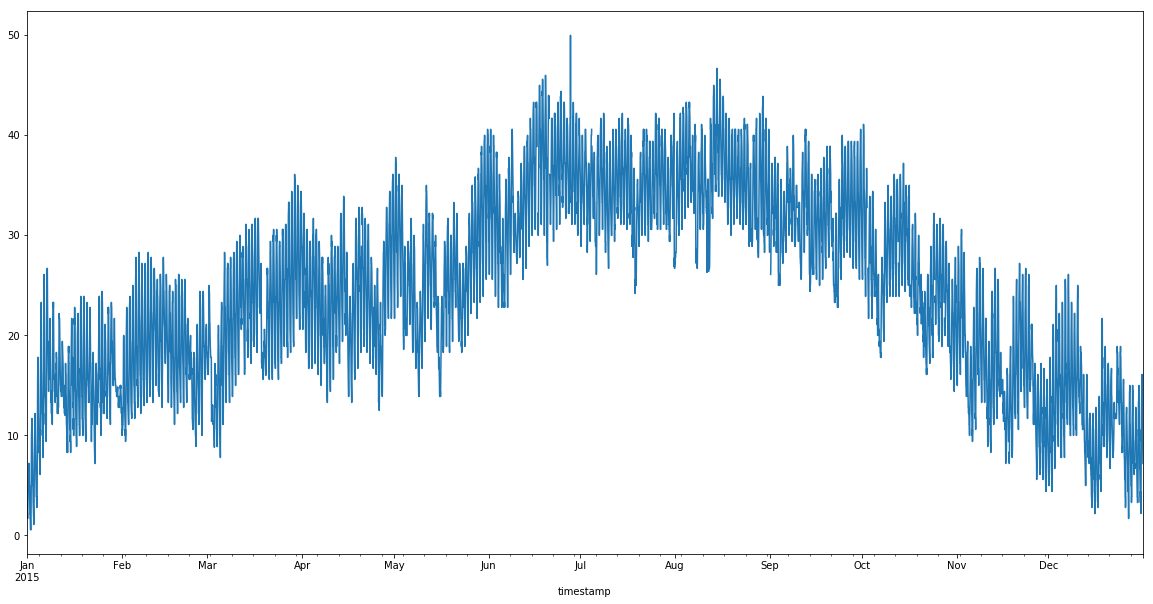

In [15]:
weather_hourly_nooutlier['TemperatureC'].plot(figsize=(20,10))

# Now let's look at the data

In [16]:
weather_hourly_nooutlier.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Freq: H
Data columns (total 7 columns):
TemperatureC             8730 non-null float64
Dew PointC               6306 non-null float64
Humidity                 8734 non-null float64
Sea Level PressurehPa    8740 non-null float64
VisibilityKm             8730 non-null float64
Precipitationmm          124 non-null float64
WindDirDegrees           6920 non-null float64
dtypes: float64(7)
memory usage: 547.5 KB


## You'll notice that the TemperatureC column has 30 spots missing

In [17]:
weather_hourly_nooutlier_nogaps = weather_hourly_nooutlier.fillna(method='ffill')

In [18]:
weather_hourly_nooutlier_nogaps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Freq: H
Data columns (total 7 columns):
TemperatureC             8760 non-null float64
Dew PointC               8753 non-null float64
Humidity                 8760 non-null float64
Sea Level PressurehPa    8760 non-null float64
VisibilityKm             8760 non-null float64
Precipitationmm          8501 non-null float64
WindDirDegrees           8760 non-null float64
dtypes: float64(7)
memory usage: 547.5 KB


In [45]:
weather_hourly

TemperatureC  Dew PointC  Humidity  \
timestamp                                                 
2015-01-01 00:00:00          2.80        -0.6      79.0   
2015-01-01 01:00:00          2.90        -0.8      77.0   
2015-01-01 02:00:00          2.80        -1.1      76.0   
2015-01-01 03:00:00          2.20        -0.6      82.0   
2015-01-01 04:00:00          2.20        -1.1      79.0   
2015-01-01 05:00:00          1.70         0.0      89.0   
2015-01-01 06:00:00          2.20         0.0      86.0   
2015-01-01 07:00:00          2.80         0.6      86.0   
2015-01-01 08:00:00          2.80         0.0      82.0   
2015-01-01 09:00:00          3.90         0.0      76.0   
2015-01-01 10:00:00          5.00        -1.1      65.0   
2015-01-01 11:00:00          5.60        -1.7      60.0   
2015-01-01 12:00:00          5.85        -2.2      57.0   
2015-01-01 13:00:00          6.70        -2.8      51.0   
2015-01-01 14:00:00          7.20        -3.3      48.0   
2015-01-01 15:00:00          7.20        -3.3      48.0   
2015-01-01 16:00:00          7.20        -3.3      48.0   
2015-01-01 17:00:00          7.20        -2.8      49.0   
2015-01-01 18:00:00          6.10        -2.2      56.0   
2015-01-01 19:00:00          5.00        -1.7      62.0   
2015-01-01 20:00:00          5.00        -2.2      60.0   
2015-01-01 21:00:00          5.00        -2.8      57.0   
2015-01-01 22:00:00          2.80        -1.1      76.0   
2015-01-01 23:00:00          2.20        -1.1      79.0   
2015-01-02 00:00:00          2.20        -2.2      73.0   
2015-01-02 01:00:00          1.70        -2.2      76.0   
2015-01-02 02:00:00          1.70        -2.2      76.0   
2015-01-02 03:00:00          1.10        -2.2      79.0   
2015-01-02 04:00:00          0.60        -2.2      82.0   
2015-01-02 05:00:00          0.00        -2.2      85.0   
...                           ...         ...       ...   
2015-12-30 18:00:00         10.60        -5.0      33.0   
2015-12-30 19:00:00          9.40        -5.0      36.0   
2015-12-30 20:00:00         10.60        -5.0      33.0   
2015-12-30 21:00:00          7.20        -4.4      44.0   
2015-12-30 22:00:00          6.70        -4.4      45.0   
2015-12-30 23:00:00          6.70        -5.0      43.0   
2015-12-31 00:00:00          5.60        -3.9      51.0   
2015-12-31 01:00:00          3.90        -3.9      57.0   
2015-12-31 02:00:00          3.90        -3.3      60.0   
2015-12-31 03:00:00          3.30        -3.9      60.0   
2015-12-31 04:00:00          4.40        -3.9      55.0   
2015-12-31 05:00:00          3.90        -3.9      57.0   
2015-12-31 06:00:00          2.80        -3.9      62.0   
2015-12-31 07:00:00          2.20        -3.9      64.0   
2015-12-31 08:00:00          5.00        -3.3      55.0   
2015-12-31 09:00:00          7.80        -3.9      44.0   
2015-12-31 10:00:00         10.60        -5.6      32.0   
2015-12-31 11:00:00         11.70        -6.1      29.0   
2015-12-31 12:00:00         12.80        -6.1      27.0   
2015-12-31 13:00:00         14.40        -5.6      25.0   
2015-12-31 14:00:00         15.00        -5.6      24.0   
2015-12-31 15:00:00         16.10        -5.6      22.0   
2015-12-31 16:00:00         15.60        -5.6      23.0   
2015-12-31 17:00:00         13.90        -5.6      26.0   
2015-12-31 18:00:00         13.30        -5.6      27.0   
2015-12-31 19:00:00         12.20        -6.1      28.0   
2015-12-31 20:00:00         11.70        -6.7      27.0   
2015-12-31 21:00:00         10.00        -6.7      31.0   
2015-12-31 22:00:00          9.40        -6.1      33.0   
2015-12-31 23:00:00          7.20        -5.6      40.0   

                     Sea Level PressurehPa  VisibilityKm  Precipitationmm  \
timestamp                                                                   
2015-01-01 00:00:00                1016.00          16.1              NaN   
2015-01-01 01:00:00                1016.70          16.1              Na

# Now we need to compare temperature and electricity consumption

In [19]:
comparison = pd.concat([Abigail['Office_Abigail'],weather_hourly_nooutlier_nogaps['TemperatureC']], axis=1)

In [20]:
comparison.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Freq: H
Data columns (total 2 columns):
Office_Abigail    8760 non-null float64
TemperatureC      8760 non-null float64
dtypes: float64(2)
memory usage: 205.3 KB


# Plot a line chart

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11beac050>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11c090ed0>], dtype=object)

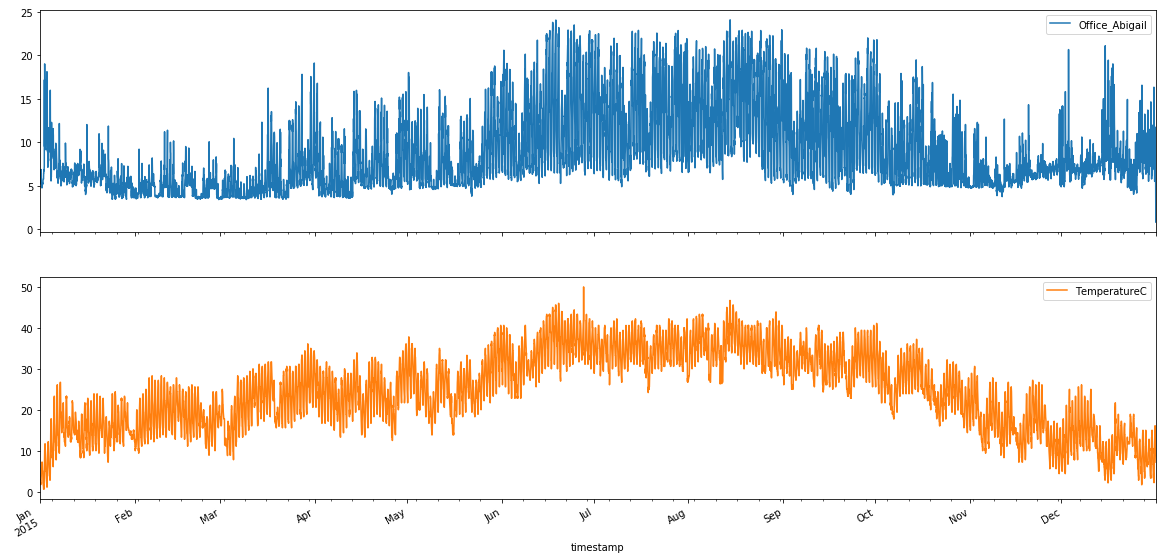

In [21]:
comparison.plot(subplots=True, figsize=(20,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11e0c49d0>], dtype=object)

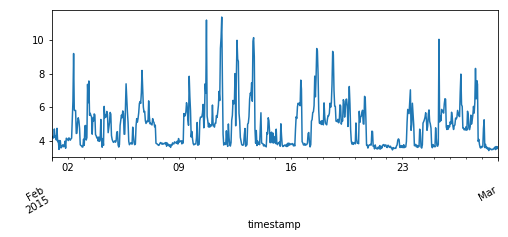

In [33]:
comparison['Office_Abigail'].truncate(before='2015-02-01',after='2015-03-01').plot(subplots=True, figsize=(8,3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11e883310>], dtype=object)

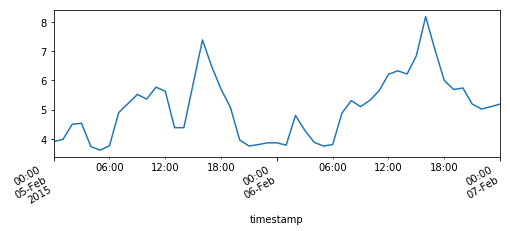

In [38]:
comparison['Office_Abigail'].truncate(before='2015-02-05',after='2015-02-07').plot(subplots=True, figsize=(8,3))

# Scatter plot

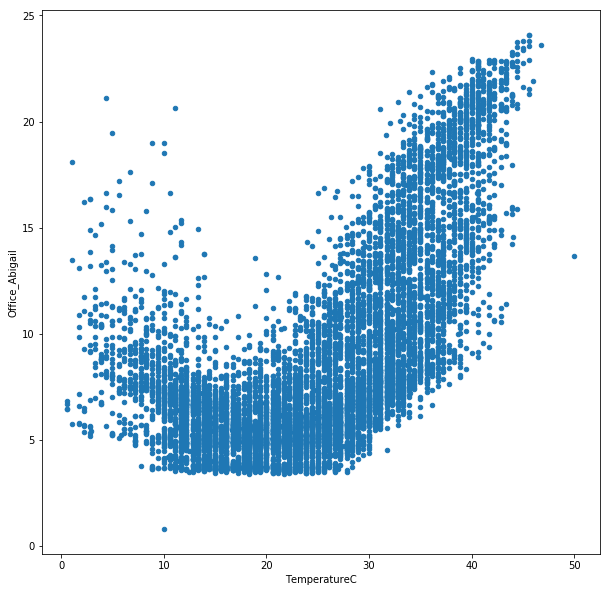

In [22]:
comparison.plot(kind='scatter', x="TemperatureC", y="Office_Abigail", figsize=(10,10))

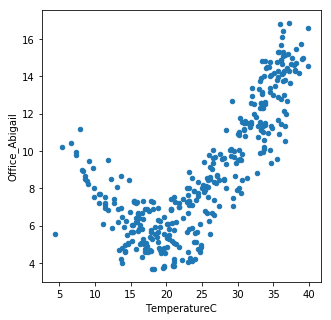

In [24]:
comparison.resample('D').mean().plot(kind='scatter', x="TemperatureC", y="Office_Abigail", figsize=(5,5))

### <font color='red'>Is it more meaningful to plot the daily SUM (in kWh/day) or the daily MEAN building energy consumption on the y-axis?

### <font color='red'>I tried both in the notebook "test mean() and sum() for energy data". The plot looks the same. Just the values on the y-axis are different.
</font>

# Cycle through all the buildings

In [42]:
building_files = ["Office_Abigail.csv","Office_Amelia.csv",
"Office_Amelie.csv",
"Office_Aubrey.csv",
"PrimClass_Angel.csv",
"UnivClass_Amya.csv",
"UnivClass_Ciara.csv",
"UnivLab_Adrian.csv",
"UnivLab_Angie.csv",
"UnivLab_Audra.csv",
"UnivLab_Cesar.csv"]

In [48]:
def scatterplot_for_cooling(buildingname, buildingfile, meta):
    rawdata = pd.read_csv(buildingfile, parse_dates=True, index_col='timestamp')
    weatherfilename = meta[meta.index == buildingname]['newweatherfilename'][0]
    weather = pd.read_csv(weatherfilename, index_col='timestamp', parse_dates=True)
    weather_hourly = weather.resample('H').mean()
    weather_hourly_nooutlier = weather_hourly[weather_hourly > -40]
    weather_hourly_nooutlier_nogaps = weather_hourly_nooutlier.fillna(method='ffill')
    rawdata = rawdata[~rawdata.index.duplicated(keep='first')]

    comparison = pd.concat([rawdata[buildingname], weather_hourly_nooutlier_nogaps['TemperatureC']], axis=1)
    comparison.plot(subplots=True, figsize=(20,10))
    comparison.plot(kind='scatter', x="TemperatureC", y=buildingname, figsize=(8,8))
    comparison.resample('D').mean().plot(kind='scatter', x="TemperatureC", y=buildingname, figsize=(5,5))

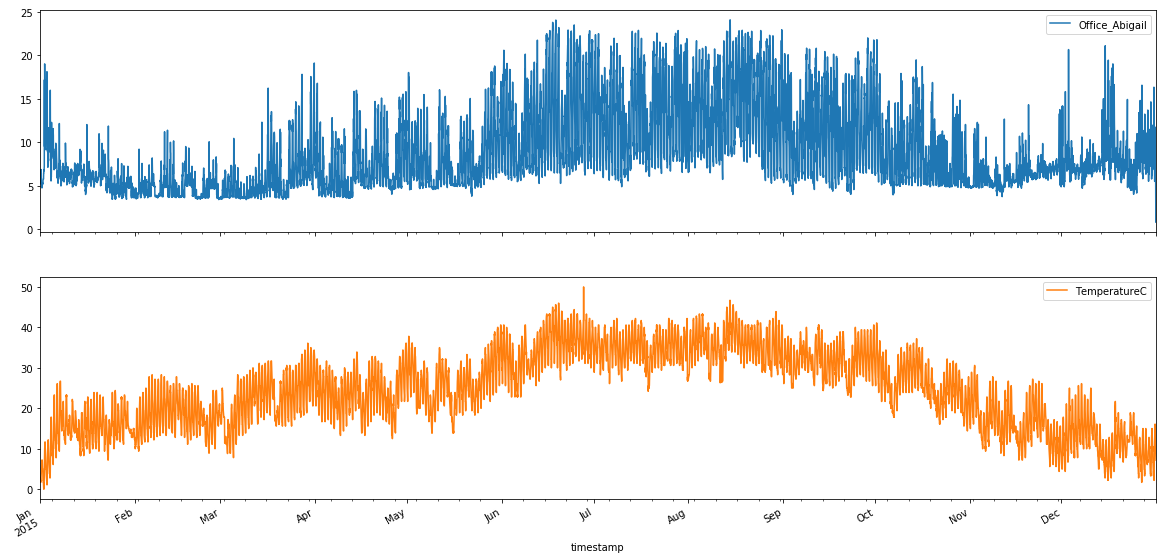

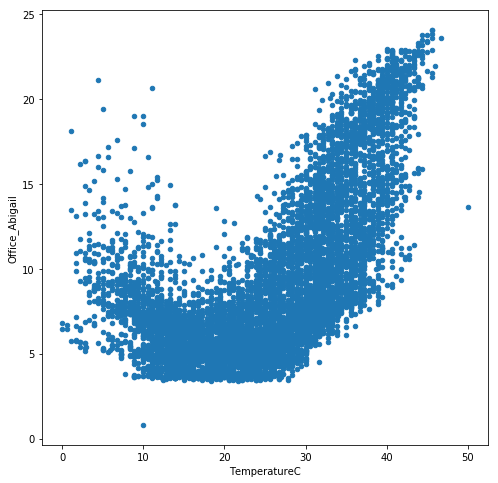

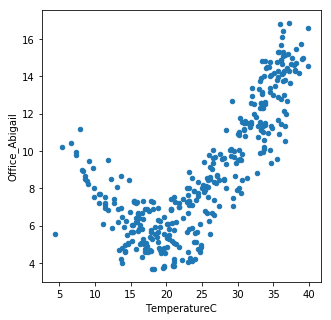

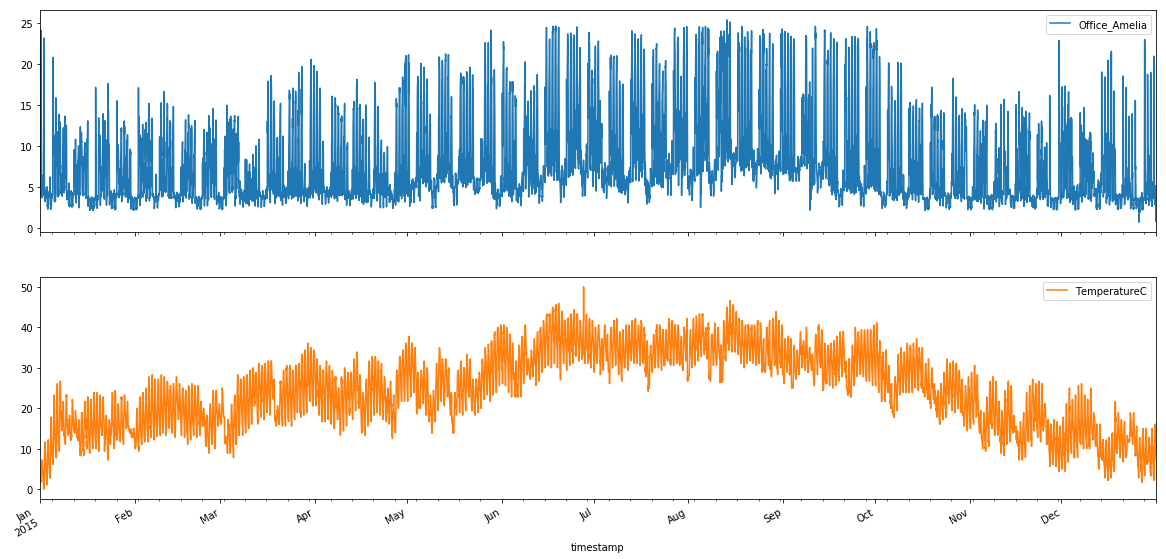

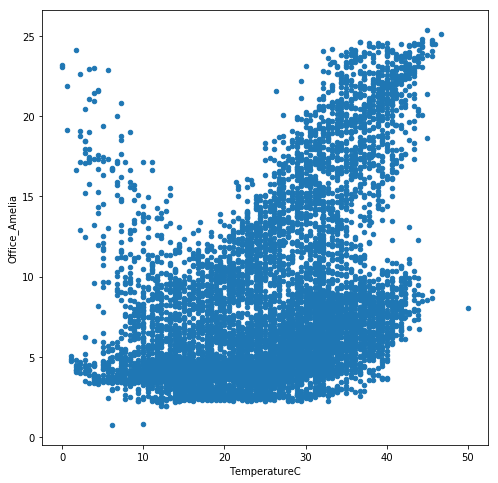

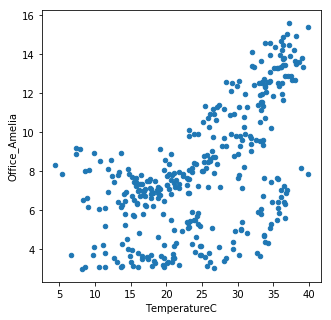

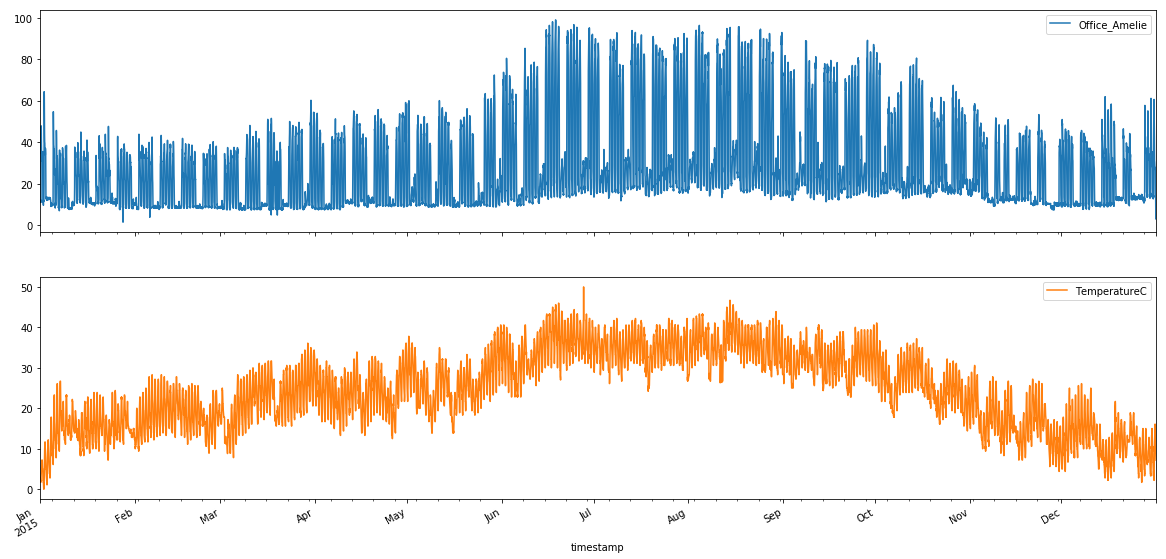

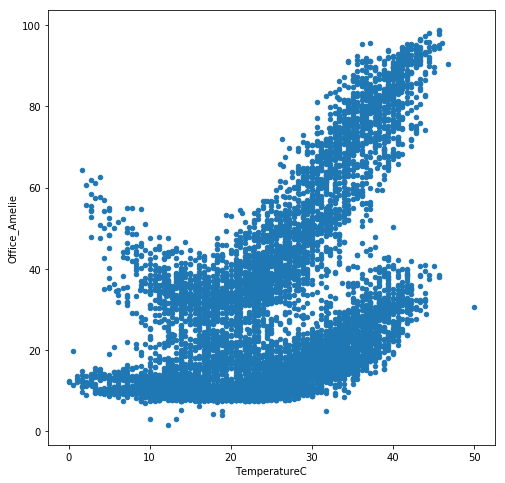

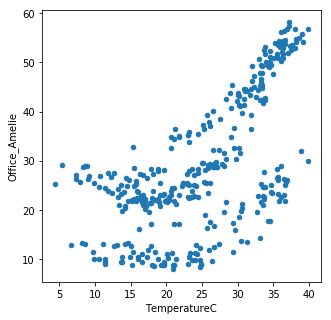

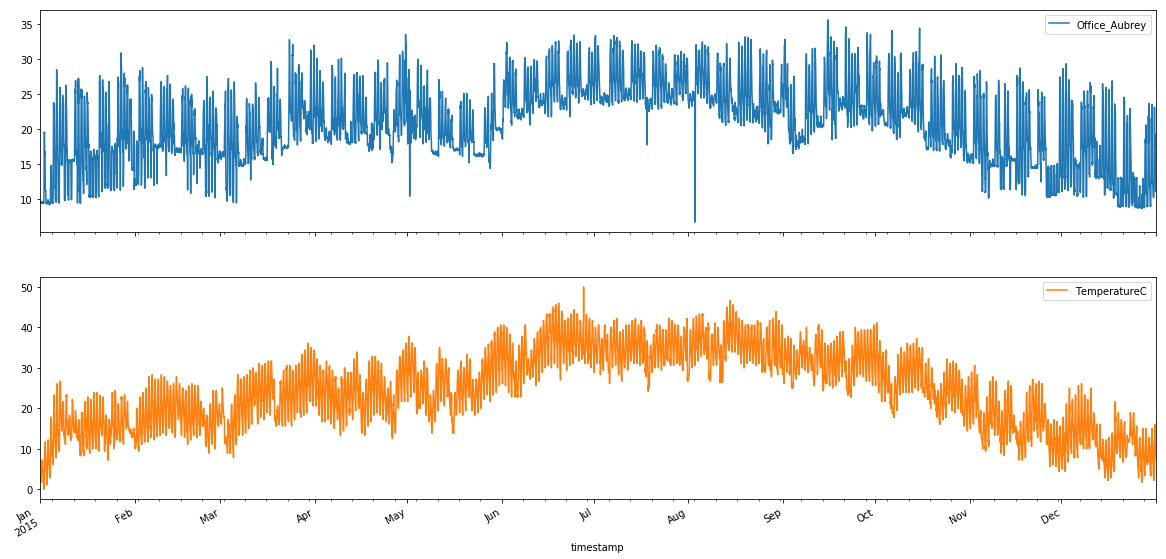

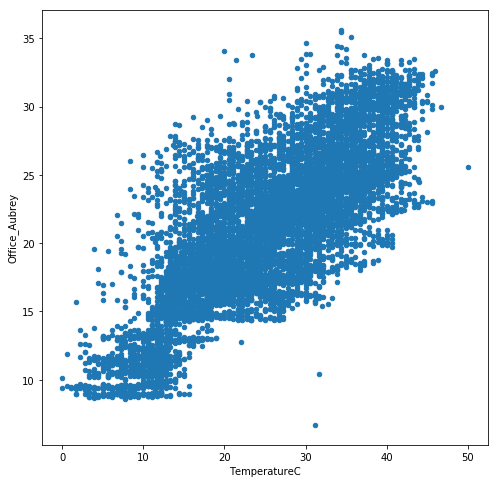

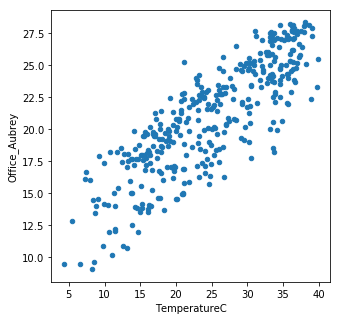

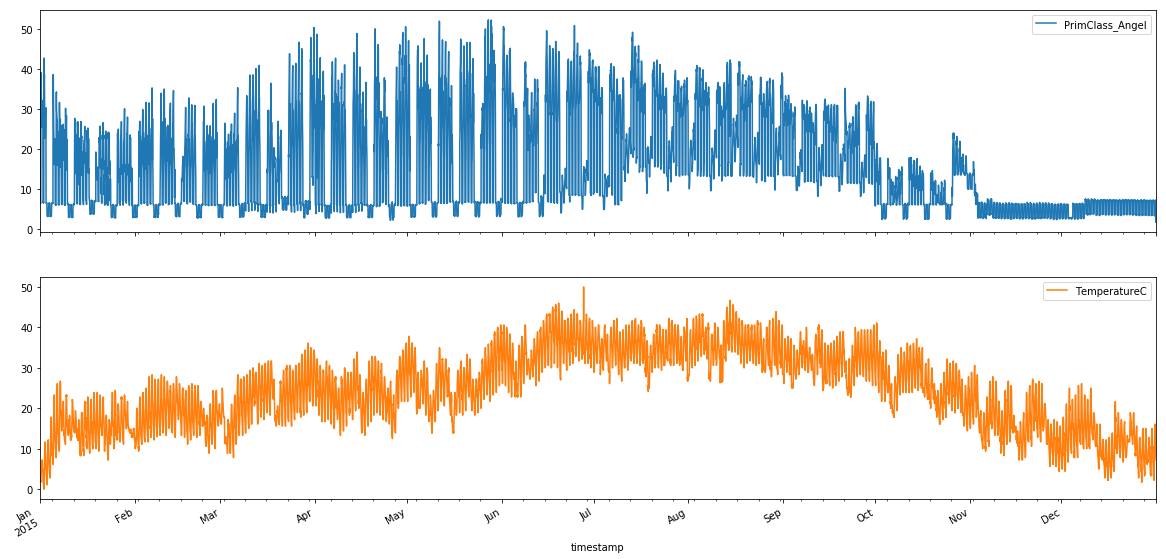

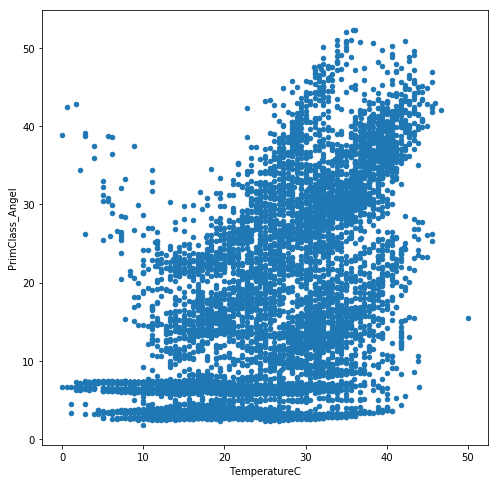

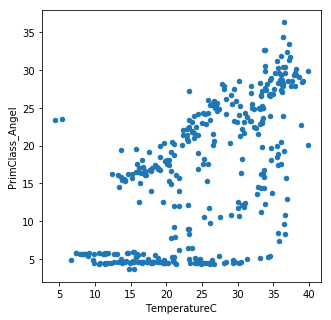

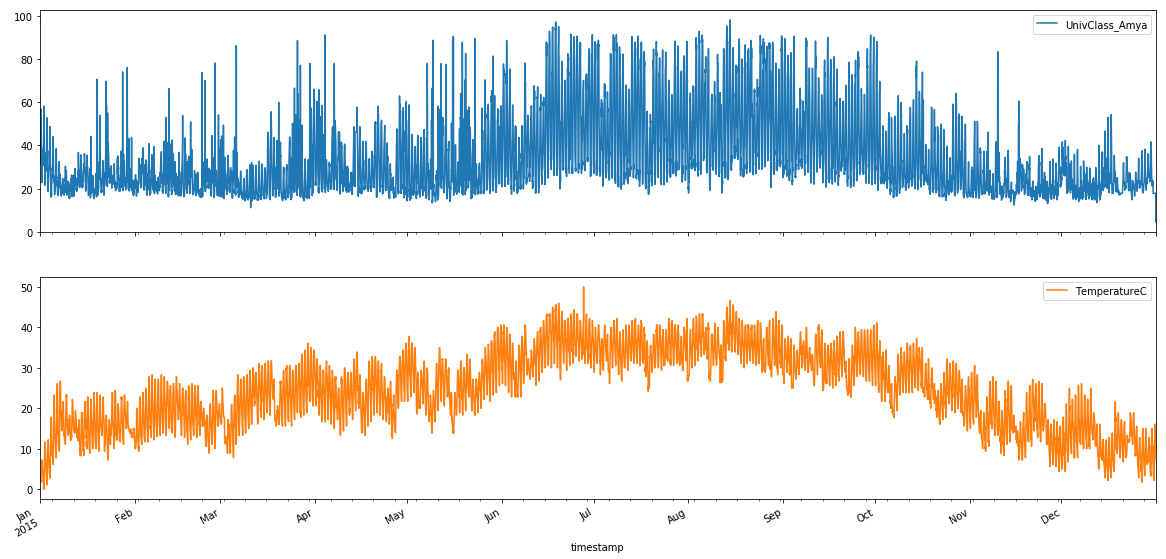

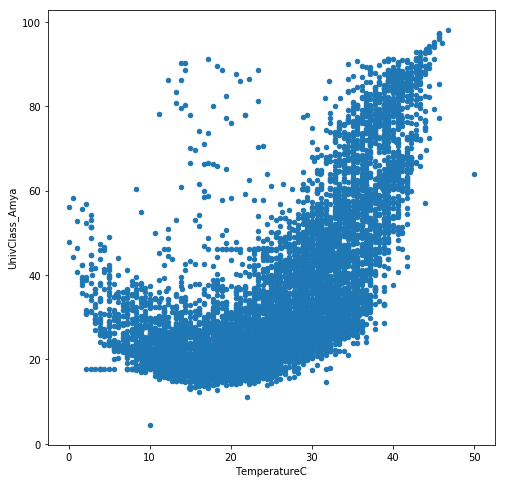

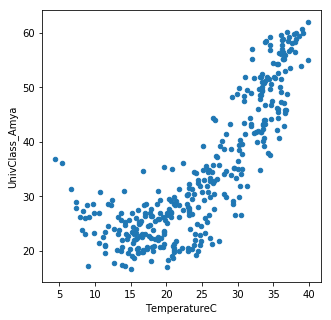

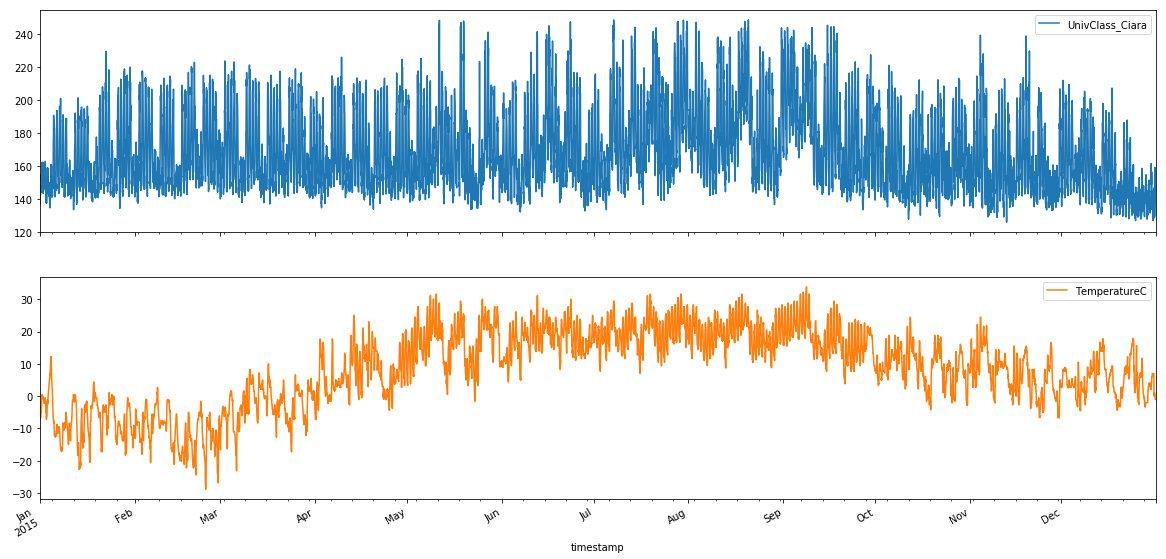

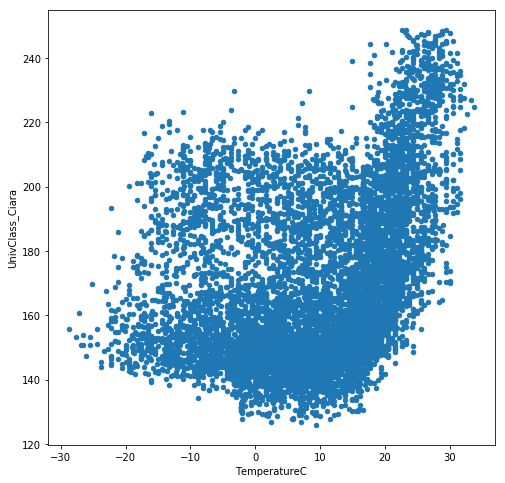

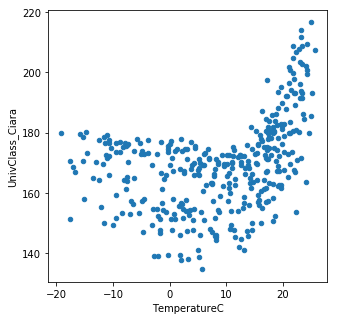

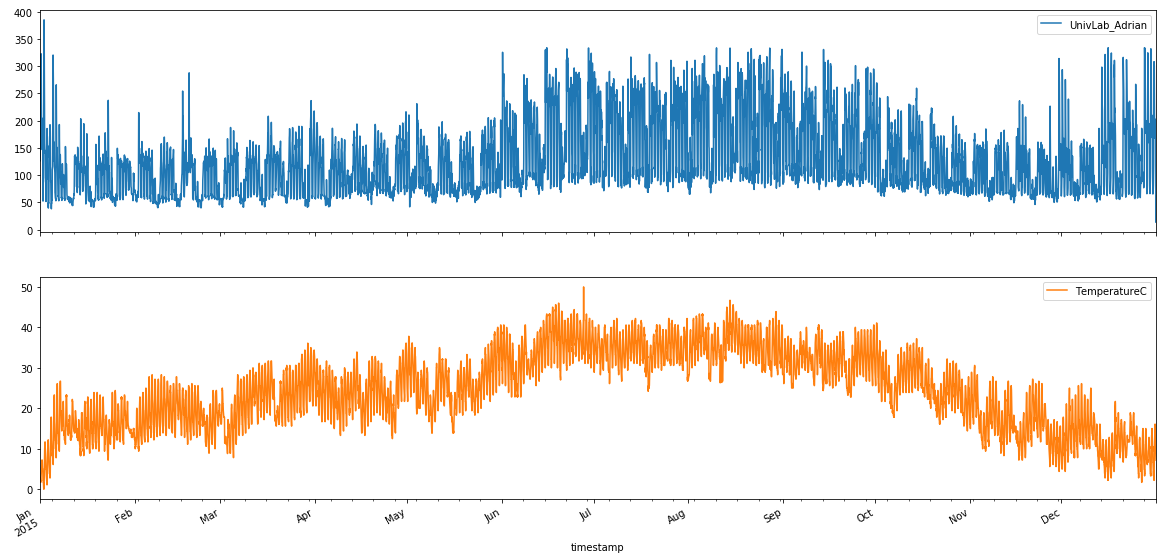

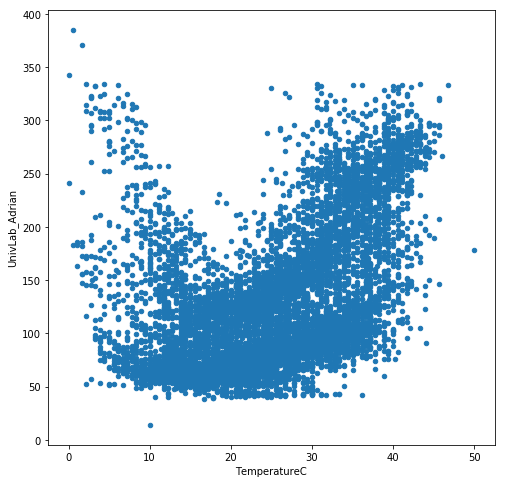

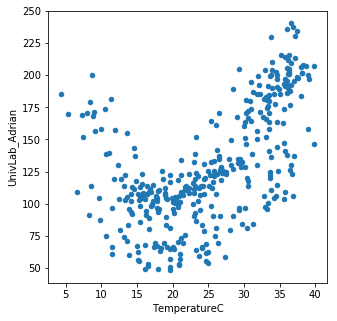

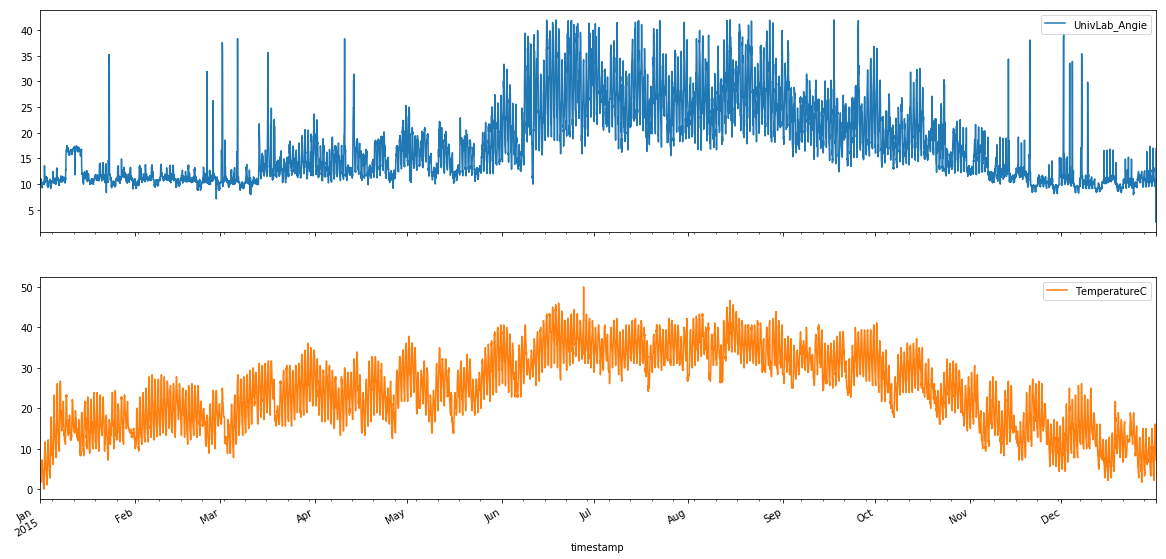

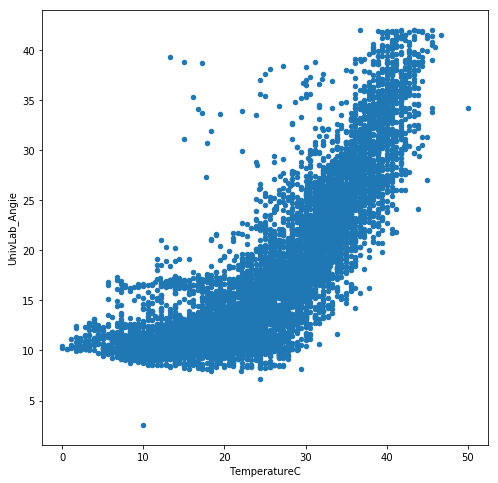

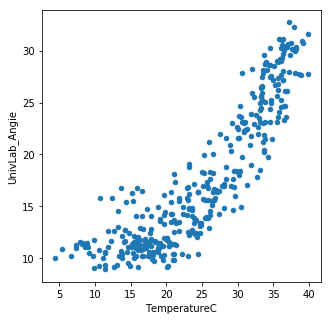

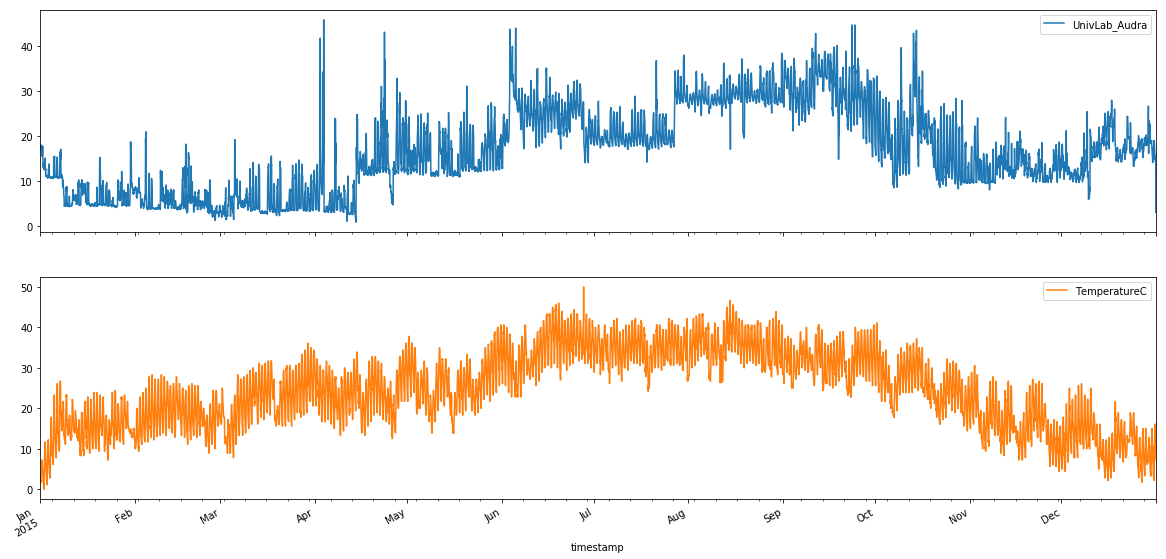

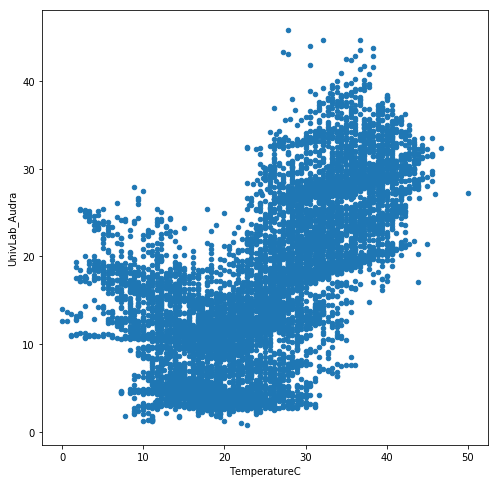

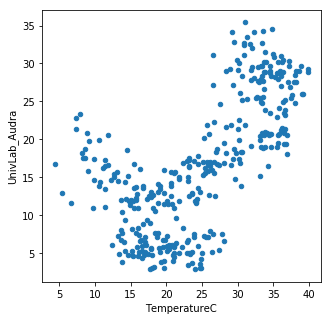

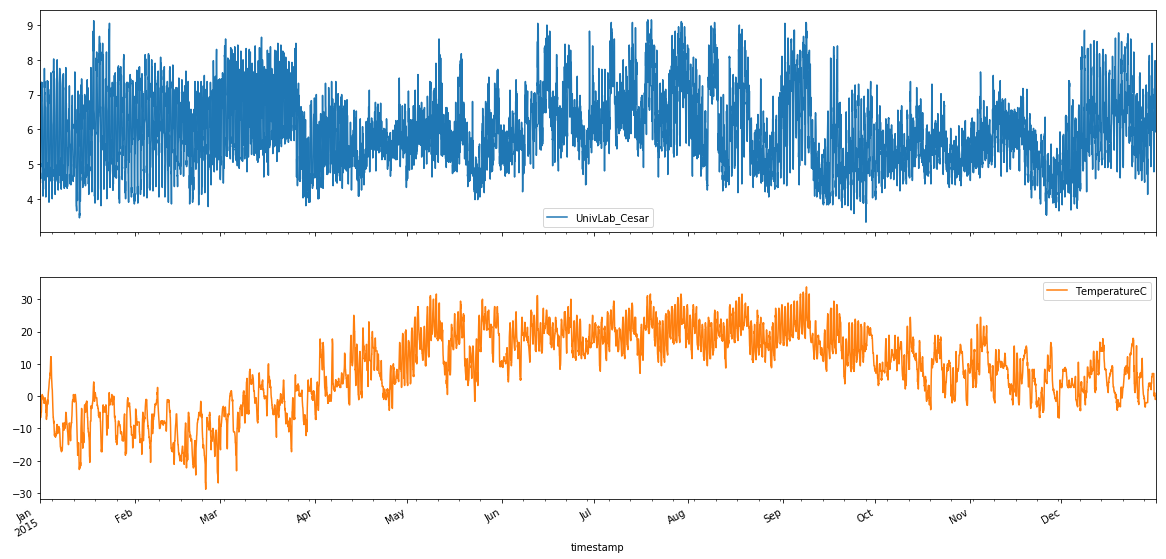

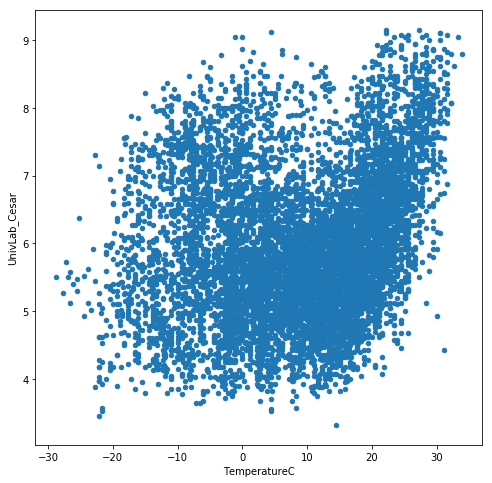

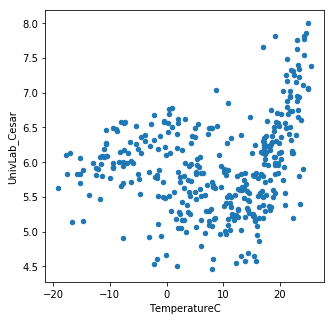

In [49]:
for buildingfile in building_files:
    scatterplot_for_cooling(buildingfile[:-4],buildingfile,meta) 